# Setup

In [14]:
!pip install pycaret

In [15]:
from pycaret.datasets import get_data
import pandas as pd

In [9]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [1]:
!pip install Jinja2
!pip install markupsafe==2.0.1

In [3]:
from pycaret.datasets import get_data
placed_data = get_data('placement')

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
from pycaret.regression import *
s = setup(placed_data, target='placed', session_id = 123)

,Description,Value
0,Session id,123
1,Target,placed
2,Target type,Regression
3,Original data shape,"(1000, 3)"
4,Transformed data shape,"(1000, 3)"
5,Transformed train set shape,"(700, 3)"
6,Transformed test set shape,"(300, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [5]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [6]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [7]:
exp.setup(placed_data, target='placed', session_id = 123)

,Description,Value
0,Session id,123
1,Target,placed
2,Target type,Regression
3,Original data shape,"(1000, 3)"
4,Transformed data shape,"(1000, 3)"
5,Transformed train set shape,"(700, 3)"
6,Transformed test set shape,"(300, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


# Compare Models

In [8]:
placement = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0220
llar,Lasso Least Angle Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0380
dummy,Dummy Regressor,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0180
en,Elastic Net,0.5005,0.2510,0.5010,-0.0293,0.3523,0.5215,0.0370
br,Bayesian Ridge,0.5002,0.2511,0.5010,-0.0295,0.3523,0.5210,0.0400
omp,Orthogonal Matching Pursuit,0.5001,0.2511,0.5011,-0.0298,0.3524,0.5208,0.0430
lar,Least Angle Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0400
huber,Huber Regressor,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0550
ridge,Ridge Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0200
lr,Linear Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.5480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [9]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5000,0.2506,0.5006,-0.0023,0.3493,0.5238
1,0.5045,0.2555,0.5055,-0.0435,0.3433,0.5317
2,0.4977,0.2480,0.4980,-0.0126,0.3568,0.5159
3,0.5024,0.2533,0.5033,-0.0206,0.3455,0.5286
4,0.4976,0.2478,0.4978,-0.0210,0.3584,0.5143
5,0.4976,0.2478,0.4978,-0.0210,0.3584,0.5143
6,0.5098,0.2612,0.5111,-0.1190,0.3397,0.5381
7,0.4975,0.2476,0.4976,-0.0318,0.3601,0.5127
8,0.4984,0.2487,0.4987,-0.0023,0.3536,0.5190


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
  !pip install gradio

In [11]:
create_app(lasso)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [16]:
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0210
llar,Lasso Least Angle Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0200
dummy,Dummy Regressor,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0330
en,Elastic Net,0.5005,0.2510,0.5010,-0.0293,0.3523,0.5215,0.0200
br,Bayesian Ridge,0.5002,0.2511,0.5010,-0.0295,0.3523,0.5210,0.0190
omp,Orthogonal Matching Pursuit,0.5001,0.2511,0.5011,-0.0298,0.3524,0.5208,0.0200
lar,Least Angle Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0200
huber,Huber Regressor,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0290
ridge,Ridge Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0200
lr,Linear Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Lasso(random_state=123)

# Anaylze Model

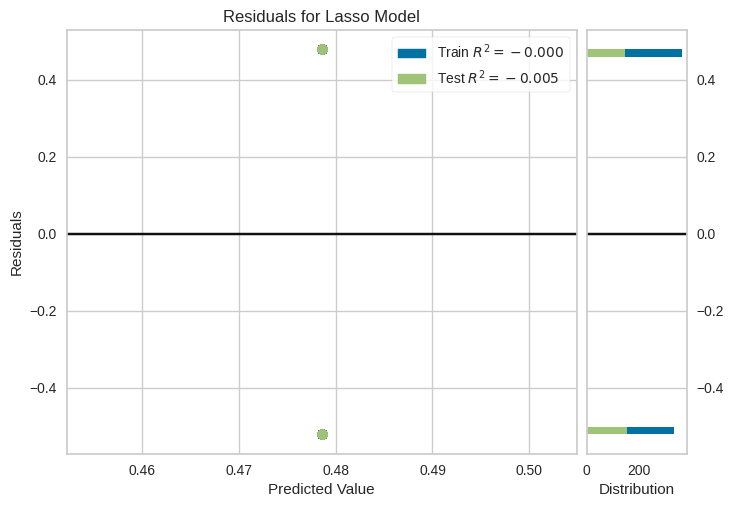

In [20]:
plot_model(placement, plot='residuals')

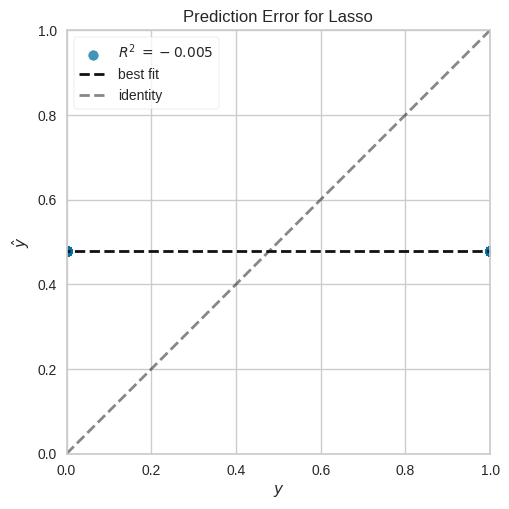

In [21]:
plot_model(placement, plot ='error')

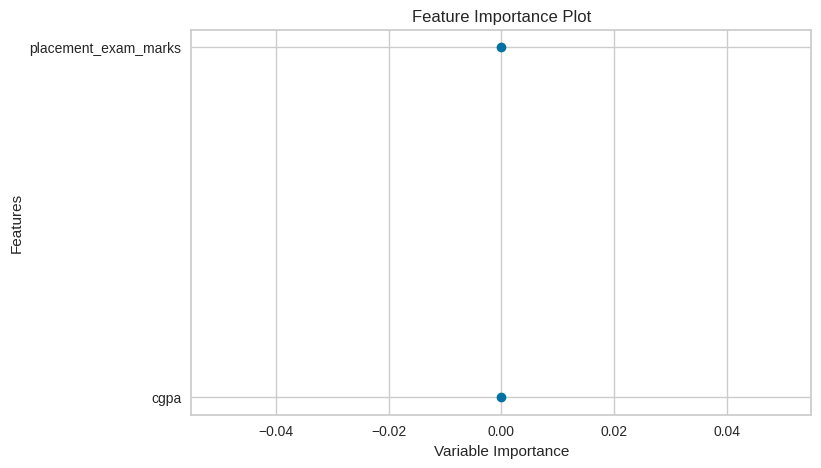

In [22]:
plot_model(placement, plot='feature')

In [23]:
evaluate_model(placement)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#Prediction

In [24]:
placement_pred = predict_model(placement)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.5006,0.2510,0.5010,-0.0048,0.3483,0.5214


In [25]:
placement_pred.head()

,cgpa,placement_exam_marks,placed,prediction_label
131,8.19,19.0,1,0.478571
203,7.93,52.0,0,0.478571
50,6.20,18.0,1,0.478571
585,7.85,49.0,1,0.478571
138,7.53,8.0,1,0.478571


In [26]:
new_placement_data = placed_data.copy()
new_placement_data.drop('placed', axis= 1, inplace=True)
new_placement_data.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


In [27]:
predictions = predict_model(placement, data = new_placement_data)
predictions.head()

,cgpa,placement_exam_marks,prediction_label
0,7.19,26.0,0.478571
1,7.46,38.0,0.478571
2,7.54,40.0,0.478571
3,6.42,8.0,0.478571
4,7.23,17.0,0.478571


# Save Model

In [28]:
save_model(placement, 'pipeline1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cgpa', 'placement_exam_marks'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', Lasso(random_state=123))]),
 'pipeline1.pkl')

In [29]:
#load pipeline
best_pipeline = load_model('pipeline1')
best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['cgpa', 'placement_exam_marks'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', Lasso(random_state=123))])

# Function-by-function overview in detail

## Setup

In [6]:
s = setup(placed_data, target= 'placed', session_id = 123)

NameError: ignored

In [31]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [32]:
get_config('X_train_transformed')

,cgpa,placement_exam_marks
498,6.89,14.0
243,6.78,55.0
314,7.43,14.0
202,6.51,48.0
300,7.36,52.0
...,...,...
988,5.64,37.0
322,6.77,38.0
382,7.55,61.0
365,7.07,25.0


In [33]:
s = setup(placed_data, target='placed', session_id = 123, normalize = True, normalize_method= 'minmax')


,Description,Value
0,Session id,123
1,Target,placed
2,Target type,Regression
3,Original data shape,"(1000, 3)"
4,Transformed data shape,"(1000, 3)"
5,Transformed train set shape,"(700, 3)"
6,Transformed test set shape,"(300, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


<Axes: >

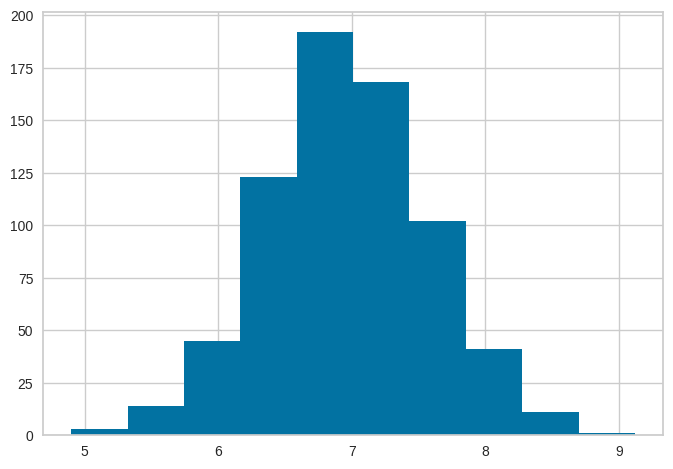

In [34]:
get_config("X_train")['cgpa'].hist()

## Compare Models

In [35]:
placed_data = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0550
llar,Lasso Least Angle Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0570
dummy,Dummy Regressor,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0590
en,Elastic Net,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0580
omp,Orthogonal Matching Pursuit,0.5003,0.2514,0.5014,-0.0309,0.3526,0.5211,0.0560
br,Bayesian Ridge,0.5010,0.2516,0.5016,-0.0319,0.3528,0.5218,0.0600
ridge,Ridge Regression,0.5004,0.2517,0.5016,-0.0320,0.3527,0.5212,0.0570
lar,Least Angle Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0580
huber,Huber Regressor,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.1180
lr,Linear Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0630


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [36]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [37]:
compare_tree_models = compare_models(include=['dt', 'rf', 'xgboost','lightgbm', 'dummy'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0600
lightgbm,Light Gradient Boosting Machine,0.5046,0.2980,0.5453,-0.2205,0.3807,0.5256,0.4160
rf,Random Forest Regressor,0.5072,0.3132,0.5593,-0.2834,0.3903,0.5234,0.1490
xgboost,Extreme Gradient Boosting,0.5226,0.3834,0.6186,-0.5706,0.4147,0.5425,0.1230
dt,Decision Tree Regressor,0.5093,0.5075,0.7109,-1.0810,0.4928,0.5155,0.0710


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [38]:
compare_tree_models

DummyRegressor()

In [39]:
results= pull()
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.060
lightgbm,Light Gradient Boosting Machine,0.5046,0.2980,0.5453,-0.2205,0.3807,0.5256,0.416
rf,Random Forest Regressor,0.5072,0.3132,0.5593,-0.2834,0.3903,0.5234,0.149
xgboost,Extreme Gradient Boosting,0.5226,0.3834,0.6186,-0.5706,0.4147,0.5425,0.123
dt,Decision Tree Regressor,0.5093,0.5075,0.7109,-1.0810,0.4928,0.5155,0.071


In [40]:
top3_model = compare_models(sort = "MSE", n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.1090
llar,Lasso Least Angle Regression,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0620
dummy,Dummy Regressor,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0630
en,Elastic Net,0.5003,0.2508,0.5008,-0.0287,0.3522,0.5214,0.0790
omp,Orthogonal Matching Pursuit,0.5003,0.2514,0.5014,-0.0309,0.3526,0.5211,0.0600
br,Bayesian Ridge,0.5010,0.2516,0.5016,-0.0319,0.3528,0.5218,0.0630
ridge,Ridge Regression,0.5004,0.2517,0.5016,-0.0320,0.3527,0.5212,0.1000
huber,Huber Regressor,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0690
lr,Linear Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.1210
lar,Least Angle Regression,0.5004,0.2518,0.5017,-0.0324,0.3528,0.5212,0.0620


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [41]:
top3_model

[Lasso(random_state=123), LassoLars(random_state=123), DummyRegressor()]

## Create Model

In [42]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [43]:
linear_reg = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5103,0.2629,0.5127,-0.0516,0.3580,0.5298
1,0.5029,0.2552,0.5052,-0.0420,0.3424,0.5356
2,0.5005,0.2521,0.5021,-0.0294,0.3591,0.5224
3,0.5007,0.2520,0.5020,-0.0155,0.3446,0.5273
4,0.4965,0.2473,0.4973,-0.0191,0.3583,0.5098
5,0.4944,0.2452,0.4952,-0.0106,0.3561,0.5170
6,0.5084,0.2605,0.5104,-0.1159,0.3394,0.5360
7,0.4997,0.2505,0.5005,-0.0439,0.3626,0.5080
8,0.4965,0.2469,0.4969,0.0049,0.3529,0.5122


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
liner_reg_results = pull()
print(type(liner_reg_results))
liner_reg_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5103,0.2629,0.5127,-0.0516,0.3580,0.5298
1,0.5029,0.2552,0.5052,-0.0420,0.3424,0.5356
2,0.5005,0.2521,0.5021,-0.0294,0.3591,0.5224
3,0.5007,0.2520,0.5020,-0.0155,0.3446,0.5273
4,0.4965,0.2473,0.4973,-0.0191,0.3583,0.5098
5,0.4944,0.2452,0.4952,-0.0106,0.3561,0.5170
6,0.5084,0.2605,0.5104,-0.1159,0.3394,0.5360
7,0.4997,0.2505,0.5005,-0.0439,0.3626,0.5080
8,0.4965,0.2469,0.4969,0.0049,0.3529,0.5122


## Create_Model
### Check all available models

In [46]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [47]:
linear_reg = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5103,0.2629,0.5127,-0.0516,0.3580,0.5298
1,0.5029,0.2552,0.5052,-0.0420,0.3424,0.5356
2,0.5005,0.2521,0.5021,-0.0294,0.3591,0.5224
3,0.5007,0.2520,0.5020,-0.0155,0.3446,0.5273
4,0.4965,0.2473,0.4973,-0.0191,0.3583,0.5098
5,0.4944,0.2452,0.4952,-0.0106,0.3561,0.5170
6,0.5084,0.2605,0.5104,-0.1159,0.3394,0.5360
7,0.4997,0.2505,0.5005,-0.0439,0.3626,0.5080
8,0.4965,0.2469,0.4969,0.0049,0.3529,0.5122


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
linear_reg_results = pull()
print(type(liner_reg_results))
linear_reg_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5103,0.2629,0.5127,-0.0516,0.3580,0.5298
1,0.5029,0.2552,0.5052,-0.0420,0.3424,0.5356
2,0.5005,0.2521,0.5021,-0.0294,0.3591,0.5224
3,0.5007,0.2520,0.5020,-0.0155,0.3446,0.5273
4,0.4965,0.2473,0.4973,-0.0191,0.3583,0.5098
5,0.4944,0.2452,0.4952,-0.0106,0.3561,0.5170
6,0.5084,0.2605,0.5104,-0.1159,0.3394,0.5360
7,0.4997,0.2505,0.5005,-0.0439,0.3626,0.5080
8,0.4965,0.2469,0.4969,0.0049,0.3529,0.5122


In [49]:
#train linear regression with fold=5
lr=create_model('lr',fold=5)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5066,0.2606,0.5105,-0.0479,0.3503,0.5420
1,0.4997,0.2513,0.5013,-0.0061,0.3513,0.5253
2,0.4969,0.2473,0.4973,-0.0191,0.3588,0.5053
3,0.5016,0.2532,0.5032,-0.0137,0.3492,0.5268
4,0.4978,0.2481,0.4981,-0.0057,0.3556,0.5111
Mean,0.5005,0.2521,0.5021,-0.0185,0.3530,0.5221
Std,0.0034,0.0048,0.0047,0.0155,0.0036,0.0129


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
#training linear reg with specific model parameters
create_model('lr', fit_intercept=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5206,0.2888,0.5374,-0.1552,0.3733,0.5486
1,0.5169,0.2859,0.5347,-0.1675,0.3616,0.5804
2,0.5043,0.2695,0.5191,-0.1004,0.3674,0.5520
3,0.5087,0.2786,0.5278,-0.1225,0.3577,0.5758
4,0.4833,0.2500,0.5000,-0.0302,0.3559,0.5434
5,0.4997,0.2751,0.5245,-0.1339,0.3686,0.5778
6,0.5038,0.2665,0.5162,-0.1415,0.3412,0.5497
7,0.4827,0.2516,0.5016,-0.0483,0.3574,0.5389
8,0.4657,0.2352,0.4849,0.0524,0.3393,0.5196


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [51]:
#return train score with cv values
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

# Save & Load Model/Experiment

In [63]:
save_model(placement, 'placement_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cgpa', 'placement_exam_marks'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', Lasso(random_state=123))]),
 'placement_model.pkl')

In [64]:
load_from_disk = load_model('placement_model')

Transformation Pipeline and Model Successfully Loaded


# Save Model/Experiment

# Save Model

In [ ]:
save_model(placement, 'pipeline1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cgpa', 'placement_exam_marks'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', Lasso(random_state=123))]),
 'pipeline1.pkl')

In [ ]:
#load pipeline
best_pipeline = load_model('pipeline1')
best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['cgpa', 'placement_exam_marks'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', Lasso(random_state=123))])